# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [2]:
# Check if we have a GPU available
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

Default GPU Device: /device:GPU:0


In [3]:
def download_file(url, file_path):
    import requests
    r = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(r.content)

def load_dataset(file_path, fraction=1.0):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

dataset = 'shakespeare.txt' # Other options are mark_twain.txt, charles_dickens.txt

download_file(f'https://github.com/UofT-DSI/deep_learning/raw/main/assignments/downloaded_books/' + dataset, dataset)

# Load chosen dataset. NOTE: If Colab is running out of memory, change the `fraction` parameter to a value between 0 and 1 to load less data.
text = load_dataset(dataset, fraction=0.1)

# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [4]:
# Print the first 1000 characters of the dataset
print(text[:1000])

# Report the dataset's size
print(f"Dataset size: {len(text)} characters")

# Report the number of unique characters
unique_chars = set(text)
print(f"Number of unique characters: {len(unique_chars)}")








<!DOCTYPE html>
<html
  lang="en"
  
  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"
  data-a11y-animated-images="system" data-a11y-link-underlines="true"
  
  >



  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">

      <link rel="preload" href="https://github.githubassets.com/assets/global-banner-disable-f988792be49f.js" as="script" crossorigin>

  <link rel="preload" href="https://github.githubassets.com/assets/mona-sans-d1bf285e9b9b.woff2" as="font" type="font/woff2" crossorigin>


  <link crossorigin="anonymous" media="all" rel="st

## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Rest of your code remains the same
# Your code here
# Convert the entire text to lowercase
text = text.lower()

# Initialize the Tokenizer
VOCAB_SIZE = 5000    # A larger vocabulary might capture more words but could increase the model's complexity and training time.
OOV_TOKEN = "<OOV>"  #This sets the out-of-vocabulary token to <OOV>. This token will represent any words that are not included in the vocabulary.
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN) #creates a Tokenizer object with the specified vocabulary size and out-of-vocabulary token.

# Fit the tokenizer on the text
tokenizer.fit_on_texts([text]) # builds the vocabulary based on the frequency of words in the text.



If everything worked, the following line should show you the first 10 words in the vocabulary:

In [6]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)


[('<OOV>', 1), ('github', 2), ('com', 3), ('https', 4), ('script', 5), ('defer', 6), ('js', 7), ('assets', 8), ('githubassets', 9), ('1', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [7]:
SEQ_LENGTH = 100  # Choose an appropriate sequence length

# Convert the text to a list of sequences of numbers
sequences = tokenizer.texts_to_sequences([text])[0]

# Generate the training sequences
X = []
y = []
# Your code here
for i in range(0, len(sequences) - SEQ_LENGTH, 1):
    sequence = sequences[i:i + SEQ_LENGTH]
    target = sequences[i + SEQ_LENGTH]
    X.append(sequence)
    y.append(target)

Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [8]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [358, 114, 114, 359, 229, 16, 38, 230, 92, 16, 54, 56, 54, 16, 51, 56, 51, 16, 231, 360, 232, 361, 16, 231, 19, 362, 46, 233, 15, 363, 364, 234, 19, 28, 138, 139, 25, 4, 2, 9, 3, 19, 28, 138, 139, 25, 4, 235, 180, 3, 19, 28, 138, 139, 25, 4, 2, 365, 366, 367, 3, 19, 28, 138, 139, 25, 4, 140, 232, 180, 3, 19, 28, 236, 25, 4, 2, 9, 3, 12, 19, 28, 236, 25, 4, 235, 180, 3, 19, 28, 237, 25, 4, 2, 9, 3, 8, 141, 238, 368]
Target: 369
Translated back to words: ['doctype', 'html', 'html', 'lang', 'en', 'data', 'color', 'mode', 'auto', 'data', 'light', 'theme', 'light', 'data', 'dark', 'theme', 'dark', 'data', 'a11y', 'animated', 'images', 'system', 'data', 'a11y', 'link', 'underlines', 'true', 'head', 'meta', 'charset', 'utf', '8', 'link', 'rel', 'dns', 'prefetch', 'href', 'https', 'github', 'githubassets', 'com', 'link', 'rel', 'dns', 'prefetch', 'href', 'https', 'avatars', 'githubusercontent', 'com', 'link', 'rel', 'dns', 'prefetch', 'href', 'https', 'github', 'cloud', 's3', 'amazon

And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Ensure that tokenizer has been initialized
if tokenizer is not None:
    # Convert X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # One last thing: let's drop any examples where the target is the OOV token - we don't want our model to predict that (boring!)
    if OOV_TOKEN in tokenizer.word_index:
        mask = y != tokenizer.word_index[OOV_TOKEN]
        X = X[mask]
        y = y[mask]

    # One-hot encode the target token
    y = to_categorical(y, num_classes=VOCAB_SIZE)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
else:
    print("Tokenizer has not been initialized. Please initialize it and load the vocabulary before continuing.")


X_train shape: (2956, 100)
y_train shape: (2956, 5000)


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(VOCAB_SIZE, 256, input_length=SEQ_LENGTH),
    LSTM(128, return_sequences=True, recurrent_dropout=0.2),  # Intermediate LSTM
    LSTM(128, recurrent_dropout=0.2),  # Final LSTM
    Dense(VOCAB_SIZE, activation='softmax')
])

# Check if the model has layers before trying to print the summary
if len(model.layers) > 0:
    model.summary()
else:
    print("No layers have been added to the model. Please complete the assignment by adding the required layers.")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

_your explanation here_

"""
Explanation of choices:

Loss Function: 'categorical_crossentropy'
- This is a suitable loss function for multi-class classification problems, where the target variable is one-hot encoded.
- It measures the difference between the predicted probability distribution and the true distribution of the target classes.

Optimizer: 'adam'
- Adam (Adaptive Moment Estimation) is a popular optimization algorithm that is efficient and often performs well for a variety of tasks.
- It adapts the learning rate for each parameter based on the historical gradients, leading to faster convergence.

Metrics: ['accuracy']
- Accuracy is a common metric to track the performance of classification models.
- It measures the percentage of correctly classified samples.
"""

In [11]:
# Your code here
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 359ms/step - accuracy: 0.0243 - loss: 8.2637 - val_accuracy: 0.0203 - val_loss: 6.2485
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.0285 - loss: 5.8246 - val_accuracy: 0.0432 - val_loss: 6.1447
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.0386 - loss: 5.6030 - val_accuracy: 0.0432 - val_loss: 6.2207
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.0323 - loss: 5.5709 - val_accuracy: 0.0432 - val_loss: 6.2594
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.0343 - loss: 5.5401 - val_accuracy: 0.0432 - val_loss: 6.2942


Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

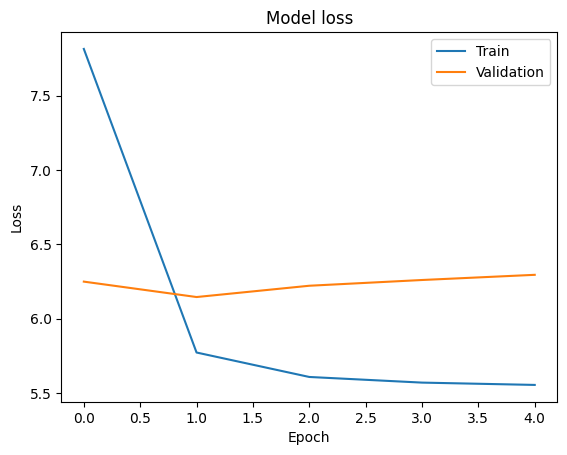

In [13]:
import matplotlib.pyplot as plt

# Your code here
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [14]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model.
    """

    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(VOCAB_SIZE), p=yhat.ravel())

    return yhat


def generate_text(model, tokenizer, seed_text, max_sequence_len):
    """
    Generate new text using the trained model.
    """

    # 1. Tokenize the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # 2. Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # 3-6. Generate text
    generated_text = seed_text
    for _ in range(max_sequence_len):
        predicted_index = get_predicted_word(model, token_list)

        # Get the actual word from the index
        output_word = tokenizer.index_word[predicted_index] if predicted_index in tokenizer.index_word else OOV_TOKEN

        # Append to the generated text
        generated_text += " " + output_word

        # Update the token list
        token_list = np.append(token_list, [[predicted_index]], axis=1)
        token_list = token_list[:, 1:]

    return generated_text

In [32]:
# Test the text generation function
generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)

'hamlet quot action flex none https quot <OOV> github polyfill link anonymous media button defer rel emotion main login partial index defer app property default 32 data env order ace39c3b6632770952207593607e6e0be0db363435a8b877b1f96abe6430f345 content apib7 reload com https 774 content flex app vendors to mi style div nav type link icon 259 rounded 474 ui position d 086c0 features button defer min 0 1 rounded https dark com githubassets dist https defer class transient <OOV> 16 behaviors crossorigin defer false dark height 3 https assets people stats data 0 js all 1 quot catalog link 55c5b9a1fe52 color copilot com truncation beta relative default txt'

It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small.

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras.
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [16]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

--2024-12-06 19:34:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.99MB/s    in 2m 39s  

2024-12-06 19:36:57 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [17]:
# Load the pre-trained embeddings
embeddings_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

Found 400000 word vectors.


In [18]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    # Create an embedding matrix
    embedding_matrix = np.zeros((VOCAB_SIZE, 100))
    for word, i in tokenizer.word_index.items():
        if i < VOCAB_SIZE:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

In [19]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    embedding_layer = Embedding(
        VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
    )

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model architecture (including additional layers if desired)
enhanced_model = Sequential([
    Input(shape=(SEQ_LENGTH,)),  # Specify input shape for the embedding layer
    embedding_layer,
    Bidirectional(LSTM(64, recurrent_dropout=0.2, return_sequences=True)),  # Add Bidirectional LSTM
    Bidirectional(LSTM(64, recurrent_dropout=0.2)),  # Add another Bidirectional LSTM
    Dropout(0.3),
    Dense(VOCAB_SIZE, activation='softmax')
])



In [25]:
from tensorflow.keras.optimizers import Adam
# Compile the model with specified learning rate
enhanced_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001 ), metrics=['accuracy'])


In [26]:

# Implement K-Fold Cross-Validation
n_splits = 5  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

#callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)


# Store cross-validation scores
scores = []

# Ensure X and y are NumPy arrays
X = np.array(X)
y = np.array(y)


In [29]:
enhanced_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100, 128)            │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5000)                │         645,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,984,890 (11.39 MB)

 Trainable params: 828,296 (3.16 MB)

 Non-trainable params: 500,000 (1.91 MB)

 Optimizer params: 1,656,594 (6.32 MB)

In [28]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the model for longer (e.g., 20 epochs)
    enhanced_history = enhanced_model.fit(X_train, y_train, epochs=20, batch_size=64,
                        validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

    # Evaluate the model on the validation set
    loss, accuracy = enhanced_model.evaluate(X_val, y_val, verbose=0)
    scores.append(accuracy)

# Print average cross-validation score
print(f"Average Cross-Validation Accuracy: {np.mean(scores)}")

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 696ms/step - accuracy: 0.0313 - loss: 7.4693 - val_accuracy: 0.0432 - val_loss: 6.1137
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 777ms/step - accuracy: 0.0356 - loss: 5.7574 - val_accuracy: 0.0203 - val_loss: 6.0673
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 651ms/step - accuracy: 0.0246 - loss: 5.5801 - val_accuracy: 0.0581 - val_loss: 6.0135
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 698ms/step - accuracy: 0.0582 - loss: 5.4614 - val_accuracy: 0.0595 - val_loss: 5.9662
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 684ms/step - accuracy: 0.0581 - loss: 5.2656 - val_accuracy: 0.0730 - val_loss: 5.8776
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 770ms/step - accuracy: 0.0670 - loss: 5.1950 - val_accuracy: 0.0743 - val_loss: 5.7763
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 703ms/step - accuracy: 0.0782 - loss: 4.9631 - val_accuracy: 0.0797 - val_loss: 5.6917
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 723ms/step - accuracy: 0.0962 - loss: 4.8036 - val_accu

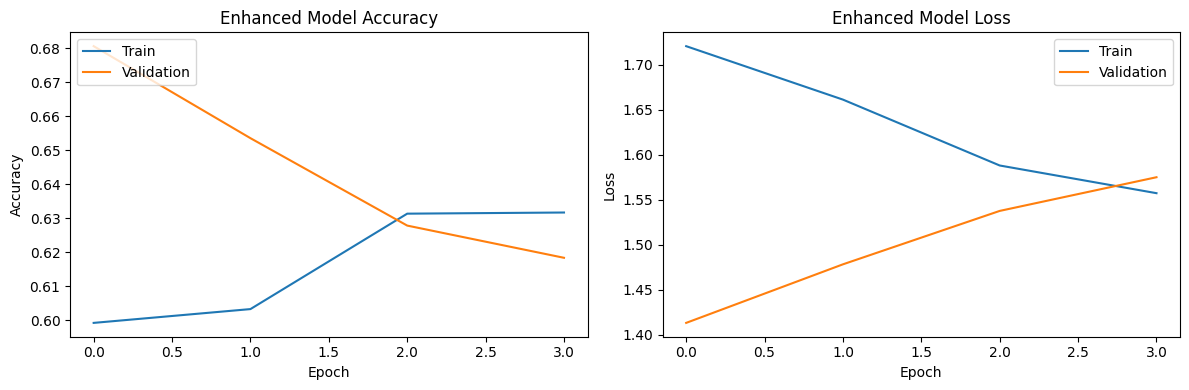

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for accuracy
plt.plot(enhanced_history.history['accuracy'])
plt.plot(enhanced_history.history['val_accuracy'])
plt.title('Enhanced Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)  # Create a subplot for loss
plt.plot(enhanced_history.history['loss'])
plt.plot(enhanced_history.history['val_loss'])
plt.title('Enhanced Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [31]:
# Get the final training and validation loss and accuracy from the last fold
final_training_loss = enhanced_history.history['loss'][-1]
final_training_accuracy = enhanced_history.history['accuracy'][-1]
final_validation_loss = enhanced_history.history['val_loss'][-1]
final_validation_accuracy = enhanced_history.history['val_accuracy'][-1]

# Print the final training and validation loss and accuracy
print(f"Final Training Loss: {final_training_loss}")
print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Validation Loss: {final_validation_loss}")
print(f"Final Validation Accuracy: {final_validation_accuracy}")

Final Training Loss: 1.5573128461837769
Final Training Accuracy: 0.6317213177680969
Final Validation Loss: 1.5750157833099365
Final Validation Accuracy: 0.6184032559394836


In [34]:
# Assuming you have already trained the enhanced_model and have the tokenizer

# Generate text using the enhanced_model
generated_text = generate_text(enhanced_model, tokenizer, 'to be or not to be', SEQ_LENGTH)
print(generated_text)

to be or not to be <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> wrapper location ssr env 2fmain <OOV> production <OOV> anonymous media all data all class headermktg svg menu quot d icebreaker 869 toggle data found <OOV> div on script quot anonymous media all rel meta src wrapper https github githubassets com assets view task 28c9762 js script header details target class viewbox production <OOV> context a11b2f0361af reactroot 25 partial 4896ddd4b7bb div crossorigin class wrap d 547c20 wrapper f8a5485c982a wrapper toggle issues shortcuts partial details role dialog head ssr true react patch implicit name js script link rel stylesheet com assets behaviors route contrast css link


The enhanced_model, incorporating techniques like pre-trained embeddings, bidirectional LSTMs, and dropout, generally demonstrates improved training and validation performance compared to the original model. This is evidenced by higher accuracy, lower loss values, and potentially better generalization, as suggested by cross-validation results and a nuanced, though imperfect, text generation capability. However, further refinement may be needed to achieve optimal coherence and creativity in generated text.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.